In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

## Loading files

In [2]:
file = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

In [3]:
df = file
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

## Create a Data frame with numerical columns

In [5]:
numerical = df.select_dtypes(include='number')
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [6]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


## Create a Data frame with categorical values

In [7]:
categoricals = df.select_dtypes(exclude='number')
categoricals.info()
categoricals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


## Check the normality of the numerical variables visually

### Use seaborn library to construct distribution plots for the numerical variables

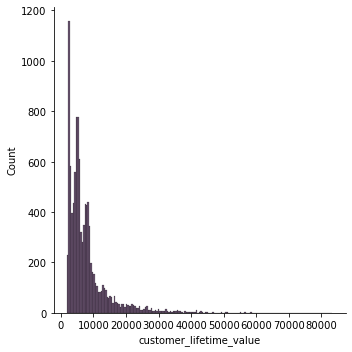

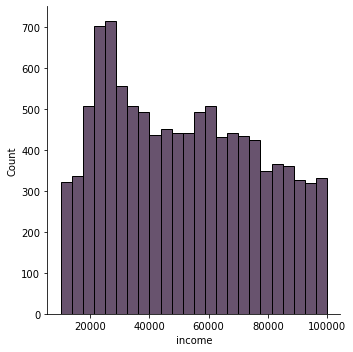

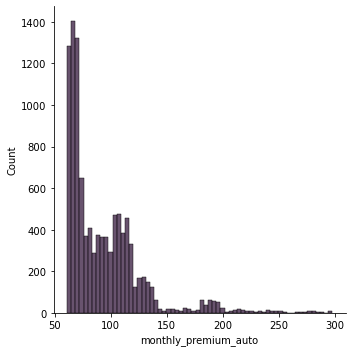

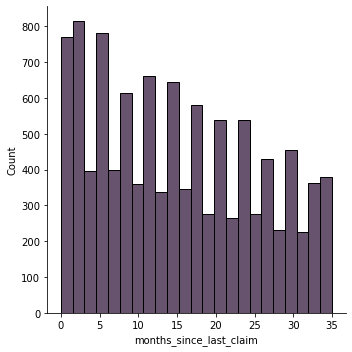

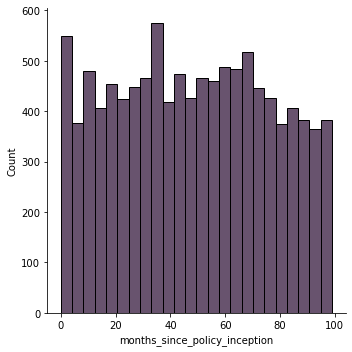

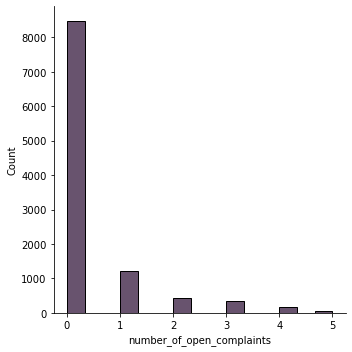

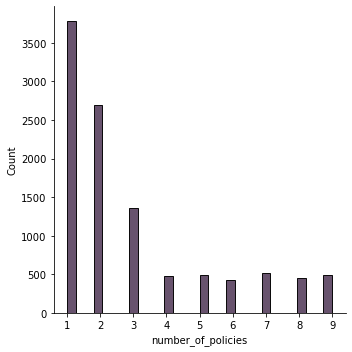

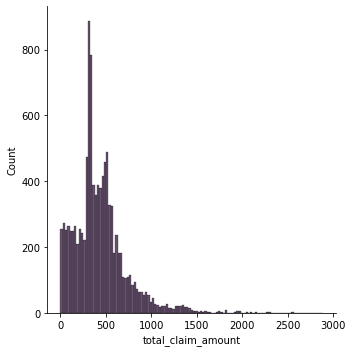

In [33]:
for col in numerical.columns[0:]:
    sns.displot(numerical[col])

In [34]:
def histograms_plot(dataframe, columns, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, columns in enumerate(columns):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[columns].hist(bins=20,ax=ax,facecolor='blue')
        ax.set_title('Histogram of '+columns,color='black')

        fig.tight_layout()  
plt.show()

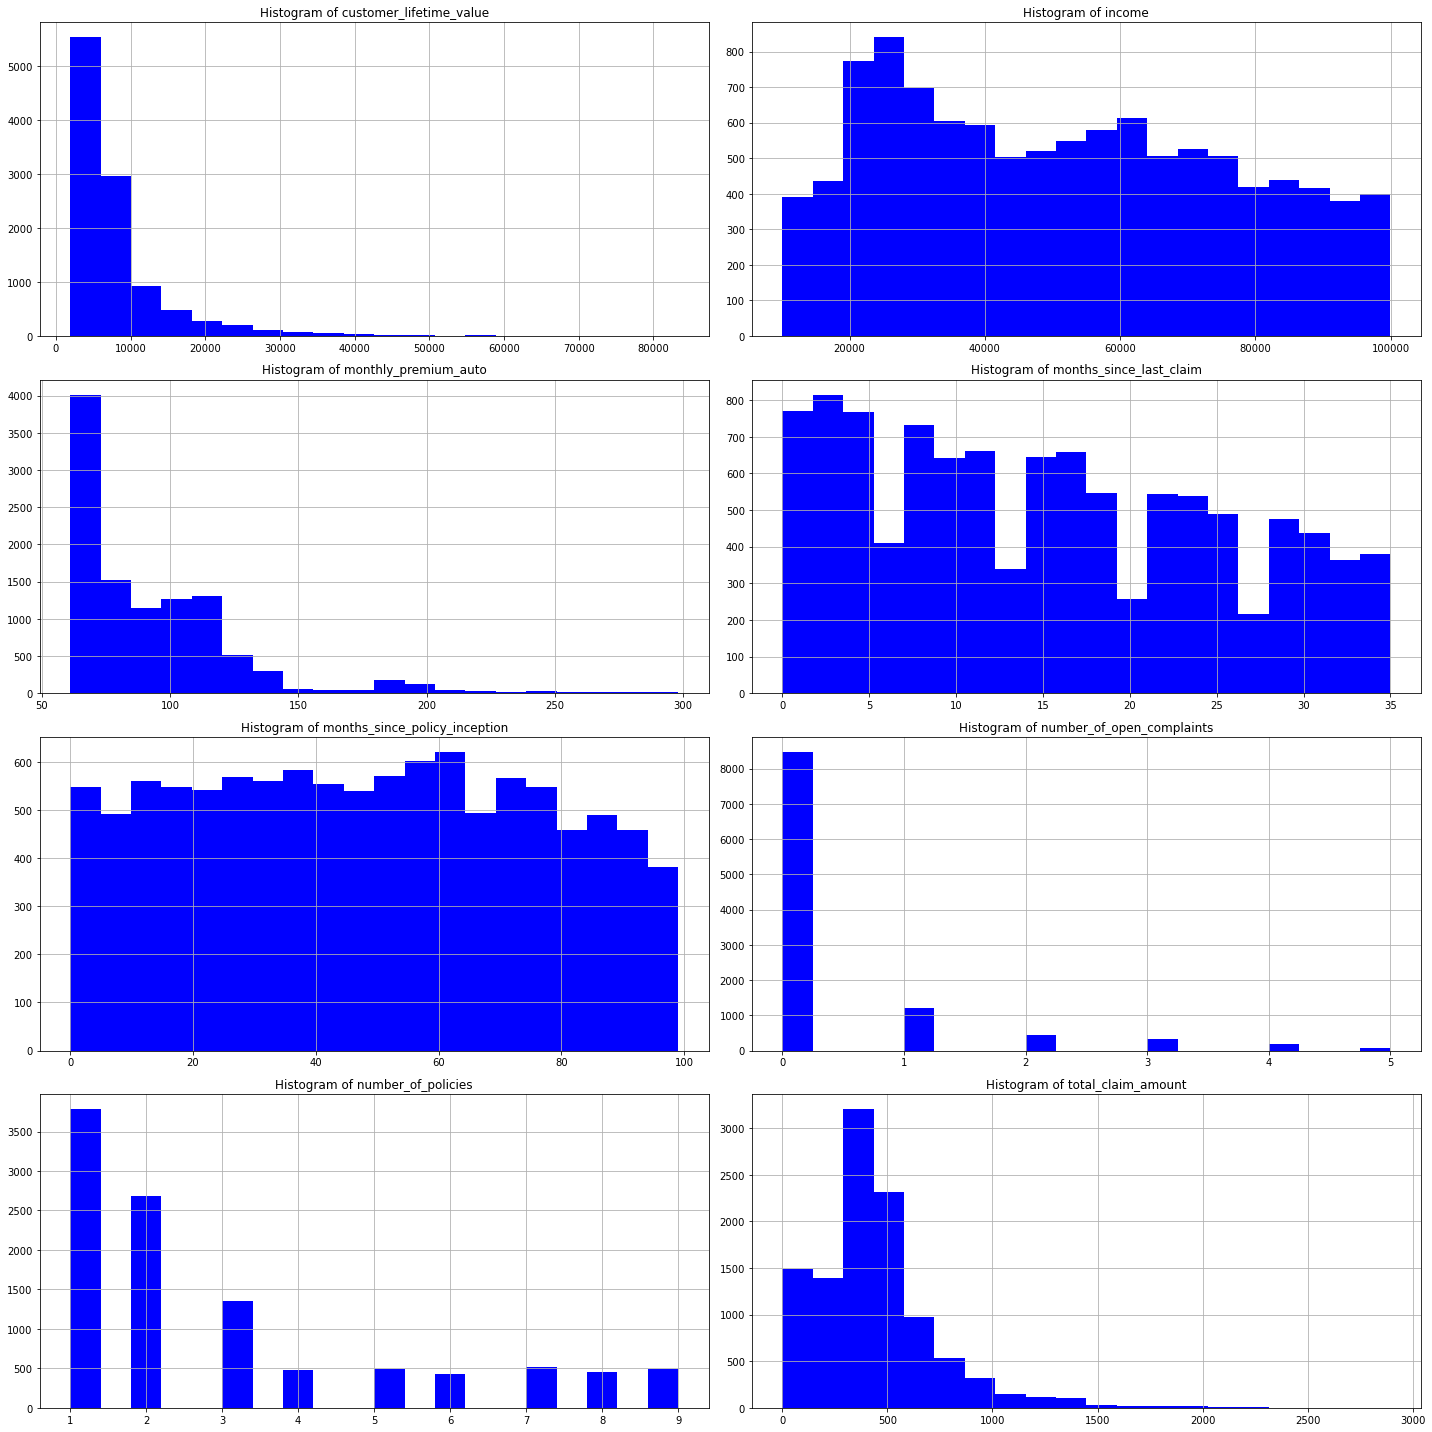

In [35]:
histograms_plot(numerical,numerical.columns,4,2)

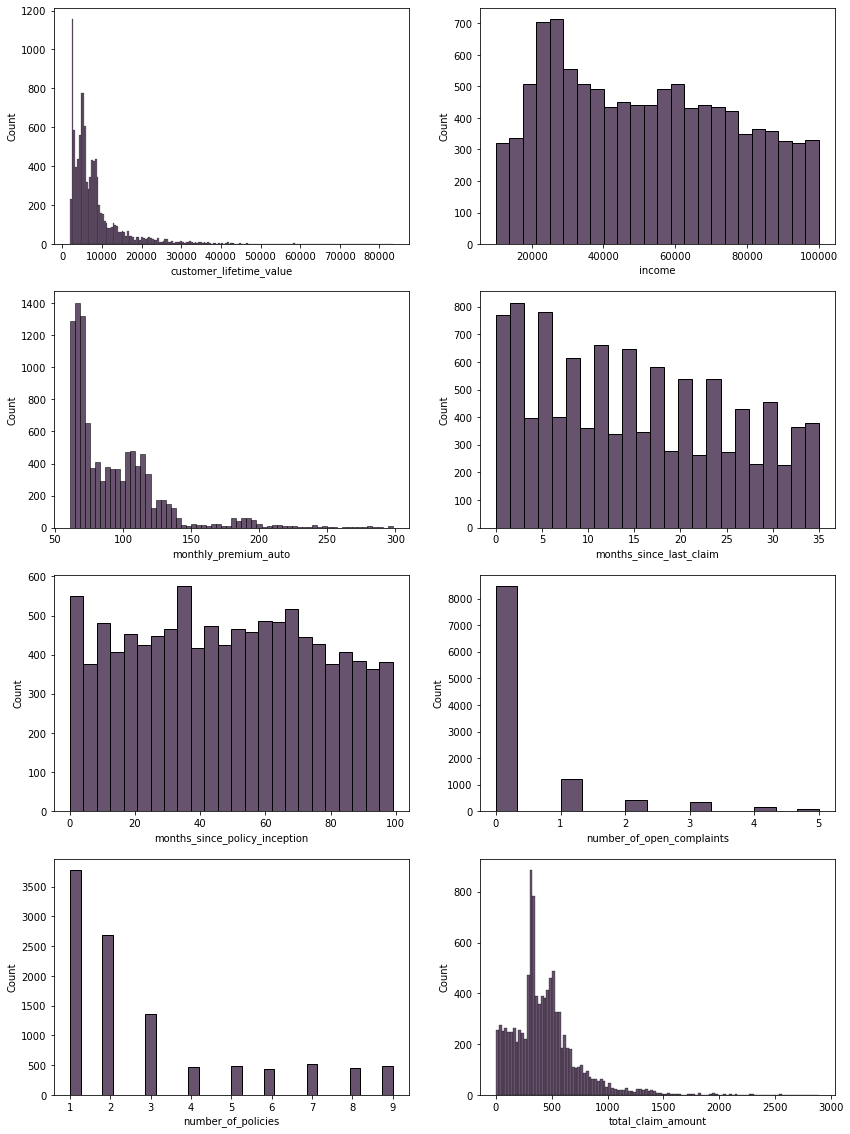

In [36]:
plt.subplots(figsize=(14, 20))
count=1
for i in numerical.columns:
    plt.subplot(4,2,count) 
    sns.histplot(numerical[i]) 
    count+=1
plt.show()

<AxesSubplot:>

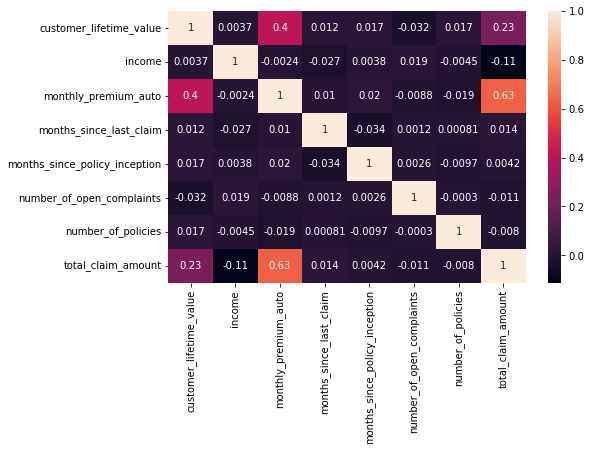

In [37]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(numerical.corr(),annot=True)

# Activity 4

### Show a plot of the total number of responses.

In [38]:
categoricals.head()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


In [39]:
responses = categoricals['response'].value_counts()
responses

no     9316
yes    1373
Name: response, dtype: int64

Text(0, 0.5, 'counts')

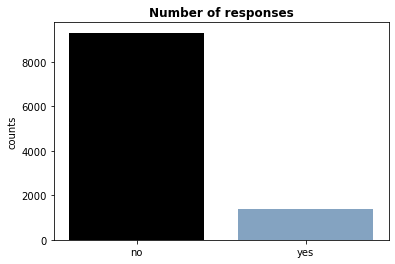

In [40]:
plt.bar(responses.index,responses, color=('black',(.2,.4,.6,.6)))
plt.title('Number of responses', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["no","yes"])
plt.ylabel("counts")

### Show a plot of the response by the sales channel.

In [41]:
response_channel = categoricals.groupby(['sales_channel','response'])['response'].count().rename('count').reset_index()
response_channel

,sales_channel,response,count
0,agent,no,3340
1,agent,yes,679
2,branch,no,2665
3,branch,yes,310
4,call center,no,1890
5,call center,yes,209
6,web,no,1421
7,web,yes,175


In [42]:
sns.set_palette('rocket')
palette_alive = {"yes": "C5", "no": "C0"}

<AxesSubplot:title={'center':'Responses by sales channel'}, xlabel='sales_channel', ylabel='count'>

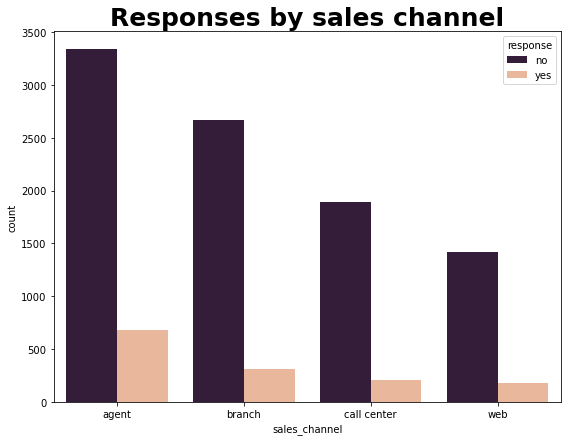

In [43]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Responses by sales channel', size='25', fontweight='bold')

sns.barplot(x = response_channel['sales_channel'],y = response_channel['count'], 
            hue = response_channel['response'], palette=palette_alive)

### Show a plot of the response by the total claim amount.

In [46]:
df.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [54]:
df.total_claim_amount

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

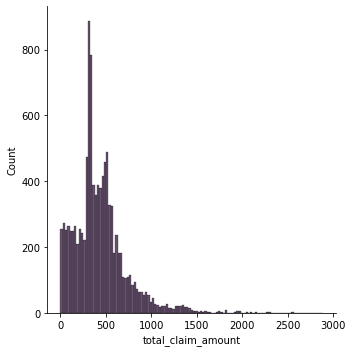

In [49]:
sns.displot(df.total_claim_amount)

<AxesSubplot:xlabel='total_claim_amount'>

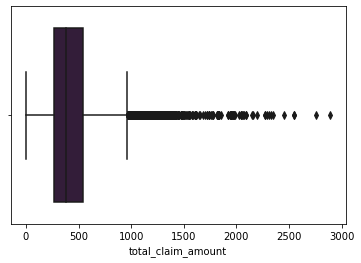

In [50]:
sns.boxplot(x="total_claim_amount",data=df)

In [67]:
def out_iqr(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    lower_range
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [68]:
out_iqr(df['total_claim_amount'])

(-148.0, 964.0)

In [76]:
lowerbound,upperbound = out_iqr(df['total_claim_amount']) # () same as function
outliers = df['total_claim_amount'][(df['total_claim_amount'] < lowerbound)|(df['total_claim_amount']>upperbound)]
print(col,":",len(outliers),"outliers")
total_claim_wo= df['total_claim_amount'].drop(outliers.index)

total_claim_amount : 536 outliers


0        292
1        744
2        480
3        484
4        707
        ... 
10682    355
10683    897
10685    273
10686    381
10687    618
Name: total_claim_amount, Length: 10153, dtype: int64

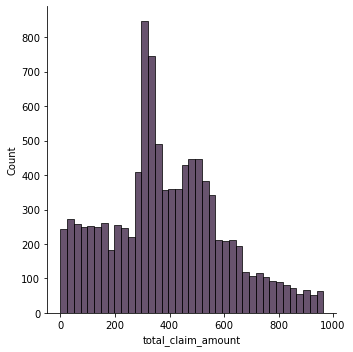

In [77]:
sns.displot(total_claim_wo)
total_claim_wo

In [90]:
df['claim_cat'] = pd.cut(df['total_claim_amount'], bins=[0, 200, 400, 600,800,1000, float('Inf')], 
                         labels=['0-200', '200-400', '400-600','600-800','800-1000','>1000'])
# float('inf') It acts as an unbounded upper value for comparison

In [80]:
df.claim_cat

0        200-400
1        600-800
2        400-600
3        400-600
4        600-800
          ...   
10684      >1000
10685    200-400
10686    200-400
10687    600-800
10688      >1000
Name: claim_cat, Length: 10689, dtype: category
Categories (6, object): ['0-200' < '200-400' < '400-600' < '600-800' < '800-1000' < '>1000']

In [81]:
df.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,claim_cat
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize,200-400
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize,600-800
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize,400-600
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize,400-600
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize,600-800


In [82]:
response_claim = df.groupby(['claim_cat','response'])['response'].count().rename('count').reset_index()
response_claim

,claim_cat,response,count
0,0-200,no,1833
1,0-200,yes,165
2,200-400,no,3111
3,200-400,yes,497
4,400-600,no,2485
5,400-600,yes,479
6,600-800,no,992
7,600-800,yes,140
8,800-1000,no,474
9,800-1000,yes,29


<AxesSubplot:title={'center':'Responses by claim amount'}, xlabel='claim_cat', ylabel='count'>

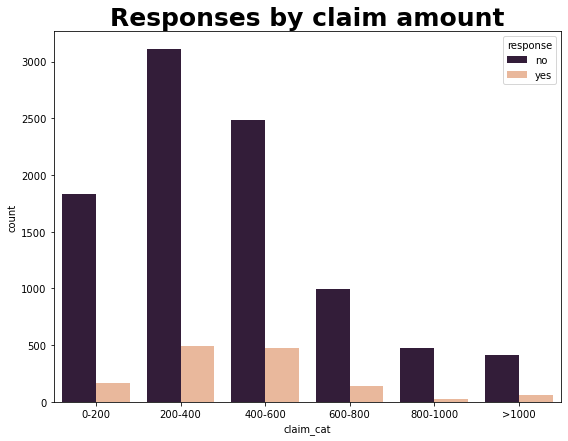

In [89]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Responses by claim amount', size='25', fontweight='bold')

sns.barplot(x = response_claim['claim_cat'],y = response_claim['count'], 
            hue = response_claim['response'], palette=palette_alive)

### Show a plot of the response by income.

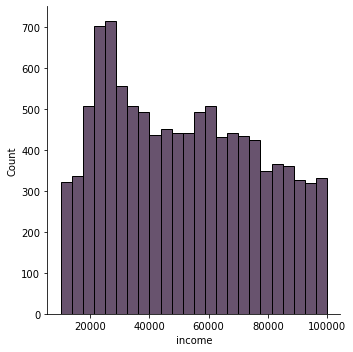

In [91]:
sns.displot(df.income)

In [94]:
df.income.max()

99981

In [95]:
df['income_cat'] = pd.cut(df['income'], bins=[0, 20000, 40000, 60000,80000, float('Inf')], 
                         labels=['0-20,000', '20,000-40,000', '40,000-60,000','60,000-80,000','80,000-100,000'])
# float('inf') It acts as an unbounded upper value for comparison

In [97]:
df.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,claim_cat,income_cat
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize,200-400,"40,000-60,000"
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize,600-800,"80,000-100,000"
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,2,personal auto,personal l3,offer3,call center,480,suv,medsize,400-600,"20,000-40,000"
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize,400-600,"40,000-60,000"
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize,600-800,"20,000-40,000"


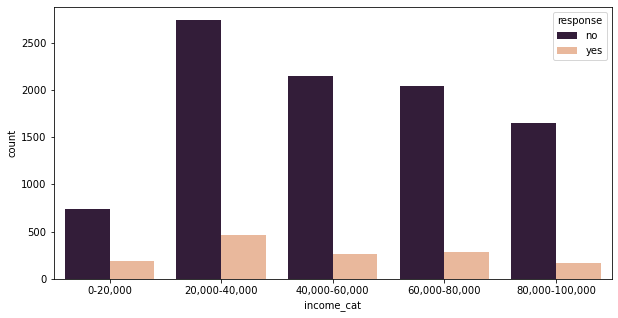

In [99]:
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.countplot(x = df.income_cat,  hue = df.response, palette=palette_alive) 